<a href="https://colab.research.google.com/github/Saurabh919yadav/Art-generator/blob/master/Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
import os, copy
from PIL import Image

In [2]:
def init_normal(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight)
    
class NN(nn.Module):
  
  def __init__(self, activation = nn.Tanh, num_neurons = 16, num_layers = 9):
    """
    
    """
    super(NN, self).__init__()
    
    layers = [nn.Linear(2, num_neurons, bias=True), activation()]
    for _ in range(num_layers - 1):
      layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
      
    layers += [nn.Linear(num_neurons, 3, bias = False), nn.Sigmoid()]
    self.layers = nn.Sequential(*layers)
    
  def forward(self, x):
    return self.layers(x)
  
  
def gen_new_image(size, save=True, **kwargs):
    net = NN(**kwargs)
    net.apply(init_normal)
    colors = run_net(net, size)
    plot_colors(colors)
    if(True):
      save_colors(colors)
      
    return net, colors
  
def run_net(net, size=128):
    x = np.arange(0, size, 1)
    y = np.arange(0, size, 1)
    colors = np.zeros((size, size, 2))
    for i in x:
      for j in y:
        colors[i][j] = np.array([float(i)/size-0.5, float(j)/size-0.5])
        
    colors = colors.reshape(size*size, 2)
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size,size,3)
  
def plot_colors(colors, fig_size = 4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)
    
def save_colors(colors):
    plt.imsave(str(np.random.randint(100000))+".png", colors)
    
def run_plot_save(net, size, fig_size=8):
    colors = run_net(net, size)
    plot_colors(colors, fig_size)
    save_colors(colors)
    

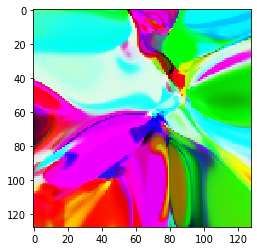

In [3]:
n, c = gen_new_image(128, save = False, num_neurons=16)

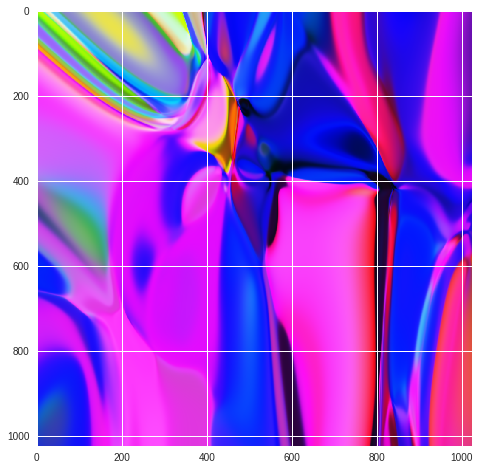

In [0]:
run_plot_save(n, 1024)

2 layers
5 layers
8 layers
11 layers
14 layers
17 layers
20 layers
23 layers
26 layers
29 layers


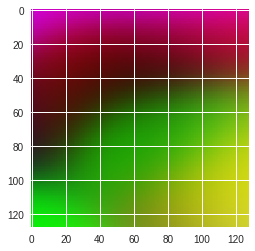

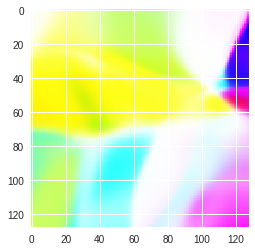

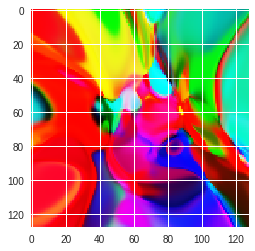

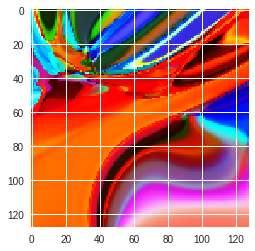

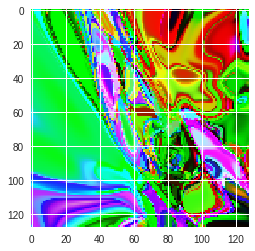

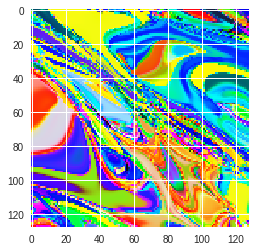

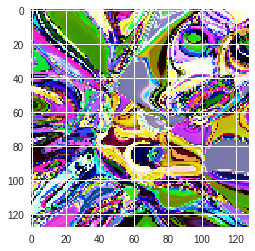

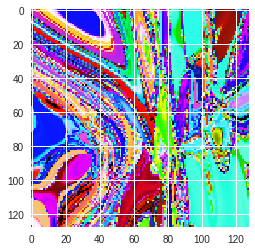

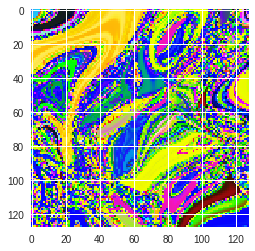

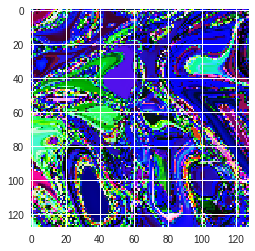

In [0]:
for num_layers in range(2, 30, 3):
    print(f"{num_layers} layers")
    n,c = gen_new_image(128, save=False, num_layers=num_layers)

29 layers
29 layers
29 layers
29 layers
29 layers


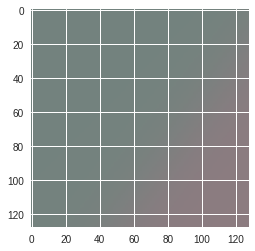

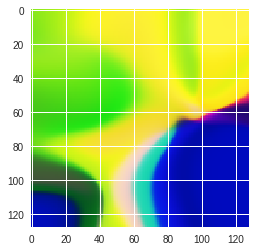

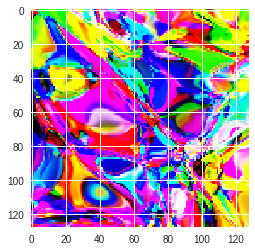

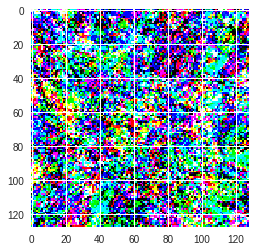

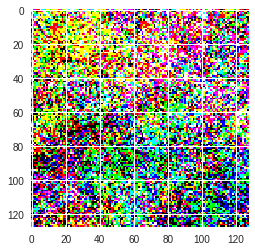

In [0]:
for i in range(1, 10, 2):
    print(f"{num_layers} layers")
    n,c = gen_new_image(128, save=False, num_neurons=2**i)

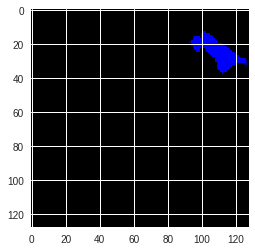

In [0]:
n,c = gen_new_image(128, save=False, activation=nn.ReLU)
